<a href="https://colab.research.google.com/github/cristiandarioortegayubro/BDS/blob/main/modulo.08/bds_aprendizaje_profundo_002_02_Optimizadores_en_Redes_Neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/Logo%20BDS%20Horizontal%208.png?raw=true">
</p>

 # **<font color="DeepPink">Optimizadores en Redes Neuronales</font>**

Ejemplo extraído de https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/

In [ ]:
# El objetivo es comparar el error de entrenamiento y testeo al aplicar SGD con la misma learning rate,
# y luego con ADAM y RMSProp


from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.callbacks import Callback
from keras import backend
from matplotlib import pyplot

In [ ]:
# prepare train and test dataset
def prepare_data():
    # generate 2d classification dataset
    X, y = make_blobs(n_samples=2000, centers=3, n_features=2, cluster_std=2, random_state=2)
    # one hot encode output variable
    y = to_categorical(y)
    # split into train and test
    n_train = 1500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    return trainX, trainy, testX, testy

In [ ]:
# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, optimizer):
    # define model
    model = Sequential()
    model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    # fit model
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
    # plot learning curves
    pyplot.plot(history.history['accuracy'], label='train')
    pyplot.plot(history.history['val_accuracy'], label='test')
    pyplot.title('opt='+optimizer, pad=-80)

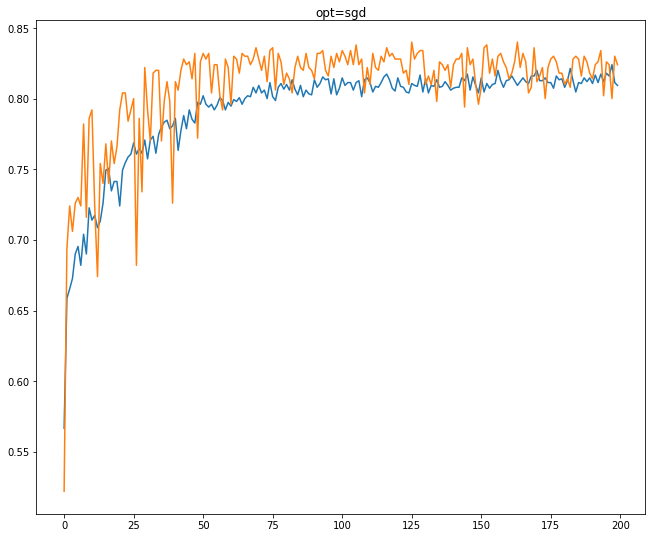

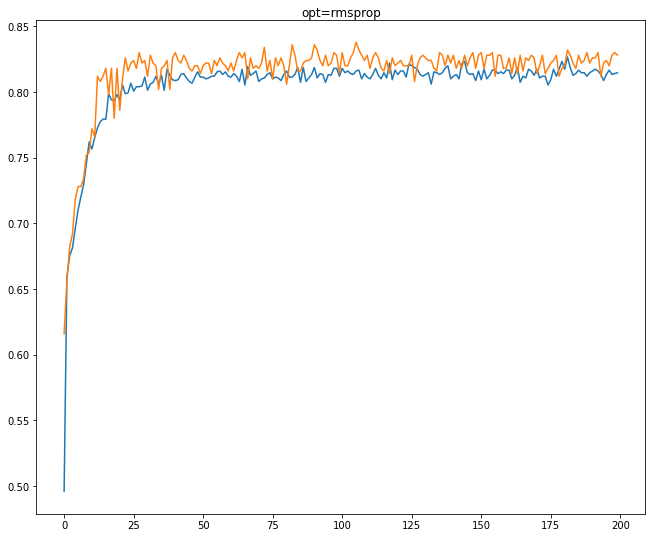

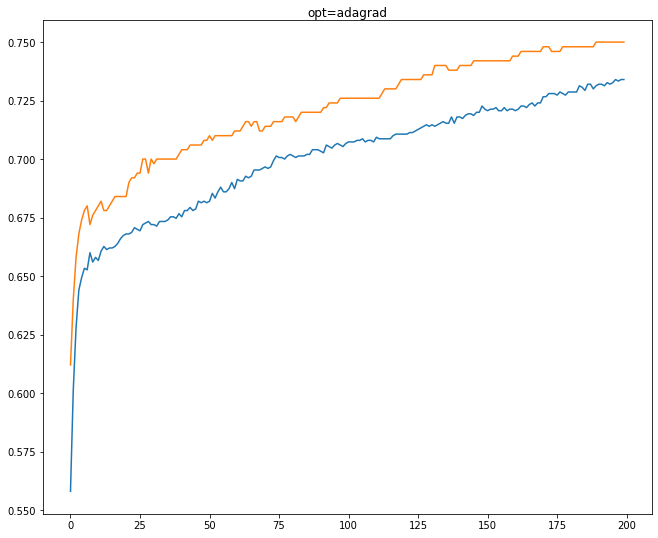

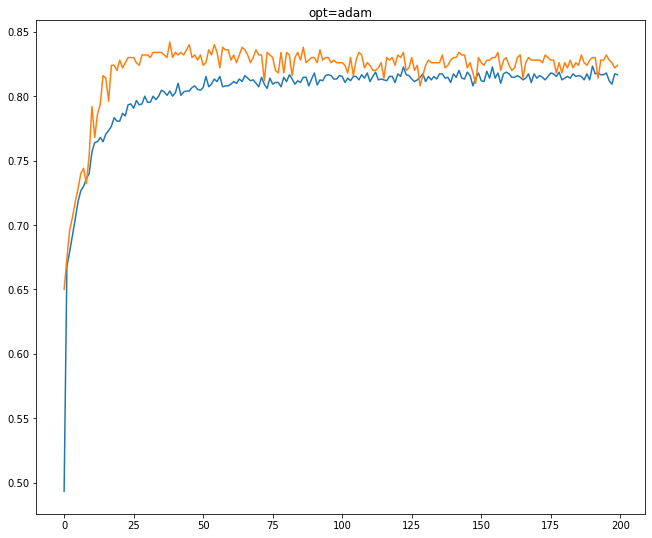

In [ ]:
# prepare dataset
trainX, trainy, testX, testy = prepare_data()
# create learning curves for different optimizers
momentums = ['sgd', 'rmsprop', 'adagrad', 'adam']
for i in range(len(momentums)):
    # determine the plot number
    pyplot.figure(figsize=[24,20])
    plot_no = 220 + (i+1)
    pyplot.subplot(plot_no)
    # fit model and plot learning curves for an optimizer
    fit_model(trainX, trainy, testX, testy, momentums[i])
    # show learning curves
    pyplot.show()

<br>
<br>
<p align="center"><b>
💗
<font color="DeepPink">
Hemos llegado al final de nuestro colab...
</font>
</p>
<br>
<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/Logo%20BDS%20Horizontal%208.png?raw=true">
</p>

---